# Installation

```pip install https://github.com/khramts/assocplots/archive/master.zip```

This tutorial provides examples of code for static Manhattan and QQ pltos. In order to view the figures in this notebook it is necessary to included the following line: 

In [4]:
%matplotlib inline

#Here we set the dimensions for the figures in this notebook
import matplotlib as mpl
mpl.rcParams['figure.dpi']=150
mpl.rcParams['savefig.dpi']=150
mpl.rcParams['figure.figsize']=7.375, 3.375

## Importing data

For this tutorial, we are using anthropometric data from the Genetic Investigation of ANthropometric Traits (GIANT) consortium:
https://www.broadinstitute.org/collaboration/giant/index.php/GIANT_consortium_data_files

Result are described in Randall JC, Winkler TW, Kutalik Z, Berndt SI, Jackson AU, Monda KL, et al. (2013) Sex-stratified Genome-wide Association Studies Including 270,000 Individuals Show Sexual Dimorphism in Genetic Loci for Anthropometric Traits. PLoS Genet 9(6): e1003500. doi:10.1371/journal.pgen.1003500
http://journals.plos.org/plosgenetics/article?id=10.1371/journal.pgen.1003500

In this tutorial we will be using one trait (hip circumference) measured in two groups: males and females. These are the files listed under Sex Stratified Anthropometrics subsection. For example, here is one of the files called GIANT_Randall2013PlosGenet_stage1_publicrelease_HapMapCeuFreq_HIP_WOMEN_N.txt and the first couple of lines looks like this:

```MarkerName A1 A2 Freq.Hapmap.Ceu BETA SE.2gc P.2gc N
rs4747841 a g 0.55 0.0054 0.0080 0.50 40354.8
rs4749917 t c 0.45 -0.0054 0.0080 0.50 40354.8
rs737656 a g 0.3667 0.0035 0.0083 0.67 40354.7
rs737657 a g 0.3583 0.0020 0.0083 0.81 40351.8```

The P.2gc column is the p-value of the association test. For the Manhattan plot, besides the p-value, we also need to know SNPs chromosome and genomic position. To obtain the chromosome number and position for each SNP I used a python script called LiftRsNumber.py from this Goncalo Abecasis’ group http://genome.sph.umich.edu/wiki/LiftOver  

Since we only need to know the SNP's chromosome, position, and p-value, I generated the following file out of the one above: HIP_WOMEN_chr_pos_rs_pval.txt, where column 1 = chromosome, 2=position, 3=SNP rs number, 4=p-value

```10 9918166 rs4747841 0.5
10 9918296 rs4749917 0.5
10 98252982 rs737656 0.67
10 98253133 rs737657 0.81```

Alternatively, you can download reduced data from https://www.dropbox.com/sh/hw6ao63ieh363nd/AAB13crEGYAic6Fjv3a-yxVVa?dl=0  
We'll beging making the plots by importing the data. 

In [5]:
import numpy as np
hip_m=np.genfromtxt('HIP_MEN_chr_pos_rs_pval.txt', dtype=None)
hip_w=np.genfromtxt('HIP_WOMEN_chr_pos_rs_pval.txt', dtype=None)

# Manhattan plots

Import the module for Manhattan plots

In [3]:
from assocplots.manhattan import *

## Classic Manhattan plot

In [4]:
chrs = [str(i) for i in range(1,23)]
chrs_names = np.array([str(i) for i in range(1,23)])
chrs_names[1::2] = ''

cmap = plt.get_cmap('viridis')
colors = [cmap(i) for i in [0.0,0.33,0.67,0.90]]

# Alternatively you can input colors by hand
from matplotlib.colors import hex2color
colors = ['#1b9e77', "#d95f02", '#7570b3', '#e7298a']
# Converting from HEX into RGB
colors = [hex2color(colors[i]) for i in range(len(colors))]

0

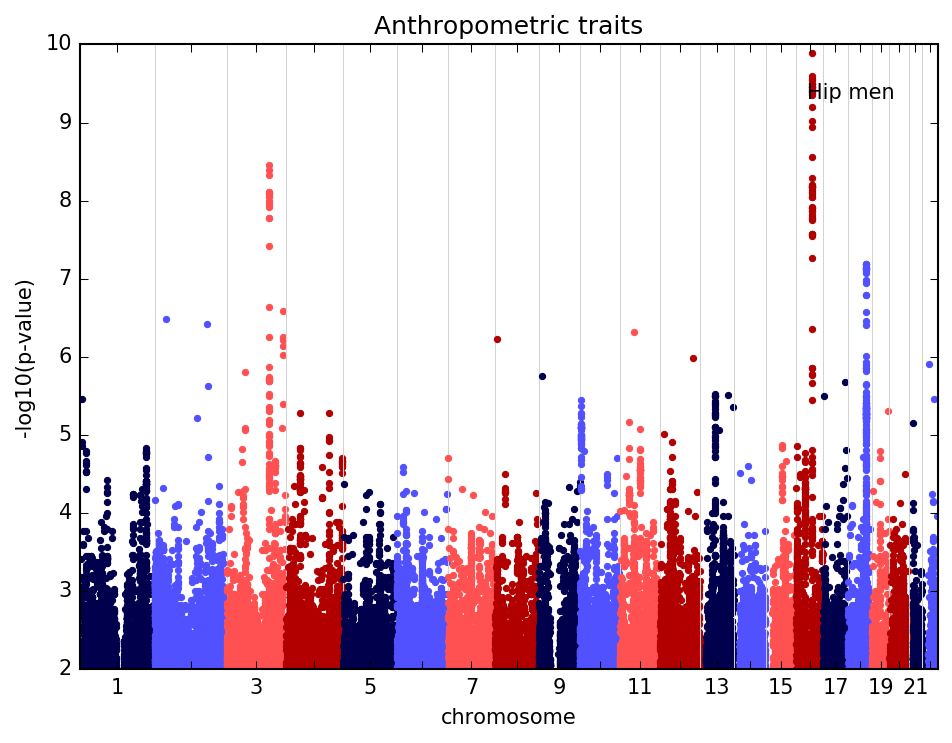

In [17]:
# hip_m['f0'].astype(str) is required in Python 3, since it reads unicode string by default

manhattan(     hip_m['f3'], hip_m['f1'], hip_m['f0'].astype(str), 'Hip men',
               type='single',
               chrs_plot=[str(i) for i in range(1,23)],
               chrs_names=chrs_names,
               cut = 2,
               title='Anthropometric traits',
               xlabel='chromosome',
               ylabel='-log10(p-value)',
               lines= [],
               colors = colors)

## Recoloring the plot

In [18]:
# To recolor the plot, select a different color map: http://matplotlib.org/examples/color/colormaps_reference.html 
cmap = plt.get_cmap('seismic')
colors = [cmap(i) for i in [0.0,0.33,0.67,0.90]]

0

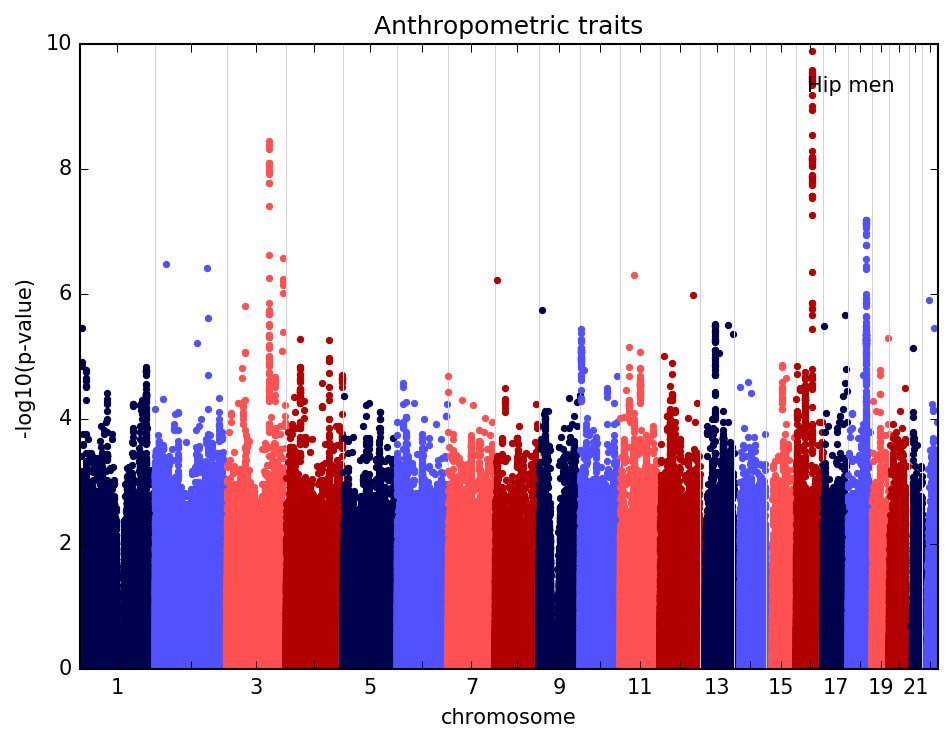

In [19]:
manhattan(     hip_m['f3'], hip_m['f1'], hip_m['f0'].astype(str), 'Hip men',
               type='single',
               chrs_plot=[str(i) for i in range(1,23)],
               chrs_names=chrs_names,
               cut = 0,
               title='Anthropometric traits',
               xlabel='chromosome',
               ylabel='-log10(p-value)',
               lines= [],
               colors = colors)

## Adding genome-wide significant line, and suggestive lines 

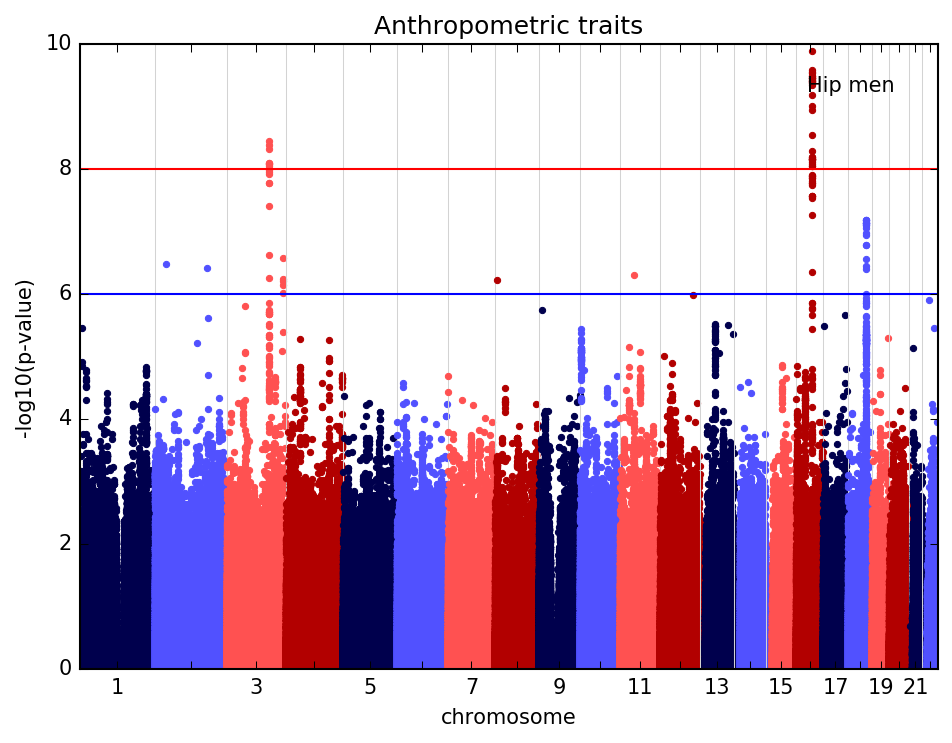

In [20]:
manhattan(     hip_m['f3'], hip_m['f1'], hip_m['f0'].astype(str), 'Hip men',
               type='single',
               chrs_plot=[str(i) for i in range(1,23)],
               chrs_names=chrs_names,
               cut = 0,
               title='Anthropometric traits',
               xlabel='chromosome',
               ylabel='-log10(p-value)',
               lines= [6, 8],
               lines_colors=['b', 'r'],
               colors = colors)
plt.savefig('Manhattan_HipMen.png', dpi=300)

## Plotting two groups in the same figure (double plot)

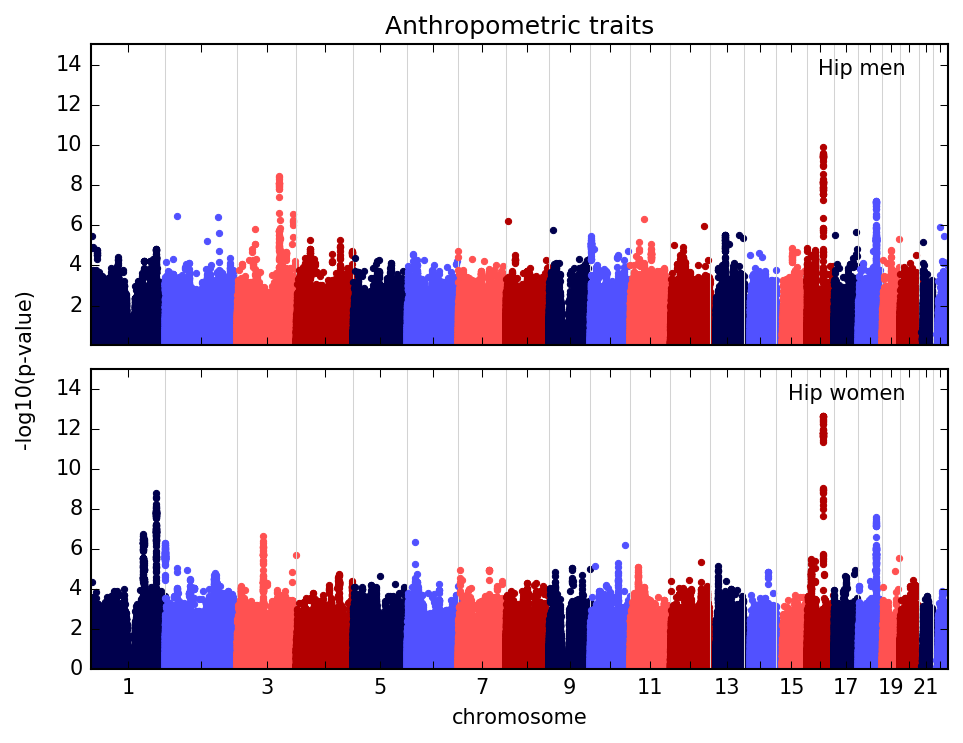

In [22]:
mpl.rcParams['figure.figsize']=7.375, 5.375

manhattan(     hip_m['f3'], hip_m['f1'], hip_m['f0'].astype(str), 'Hip men',
               p2=hip_w['f3'], pos2=hip_w['f1'], chr2=hip_w['f0'].astype(str), label2='Hip women',
               type='double',
               chrs_plot=[str(i) for i in range(1,23)],
               chrs_names=chrs_names,
               cut = 0,
               title='Anthropometric traits',
               xlabel='chromosome',
               ylabel='-log10(p-value)',
               lines= [],
               top1 = 15,
               top2 = 15,
               colors = colors)
plt.subplots_adjust(hspace=0.08)

## Plotting two groups in the same figure (inverted plot)

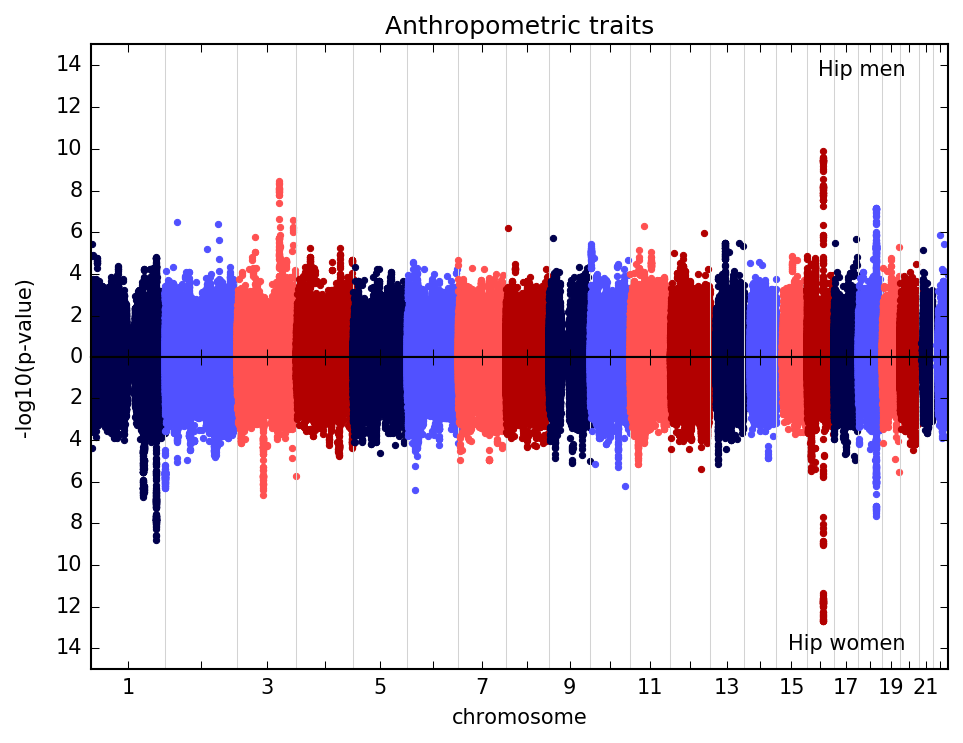

In [23]:
mpl.rcParams['figure.figsize']=7.375, 5.375
manhattan(     hip_m['f3'], hip_m['f1'], hip_m['f0'].astype(str), 'Hip men',
               p2=hip_w['f3'], pos2=hip_w['f1'], chr2=hip_w['f0'].astype(str), label2='Hip women',
               type='inverted',
               chrs_plot=[str(i) for i in range(1,23)],
               chrs_names=chrs_names,
               cut = 0,
               title='Anthropometric traits',
               xlabel='chromosome',
               ylabel='-log10(p-value)',
               lines= [],
               top1 = 15,
               top2 = 15,
               colors = colors)
plt.savefig('Manhattan_Hip_inverted.png', dpi=300)

# QQ plots

First, let's impot the module for QQ plots:

In [6]:
from assocplots.qqplot import *

assocplots\qqplot.py:60: RuntimeWarning: invalid value encountered in less
  q_err[i, q_err[i, :] < 0] = 1e-15
assocplots\qqplot.py:69: RuntimeWarning: divide by zero encountered in log10
  plt.plot(-np.log10(q_th[:n_quantiles]), -np.log10(q_data[:n_quantiles]), '.', color=color[j], label=labels[j])
assocplots\qqplot.py:78: RuntimeWarning: divide by zero encountered in log10
  plt.fill_between(-np.log10(q_th), -np.log10(q_err[:,0]), -np.log10(q_err[:,1]), color=color[j], alpha=fill_dens[j], label='%1.3f CI'%alpha)


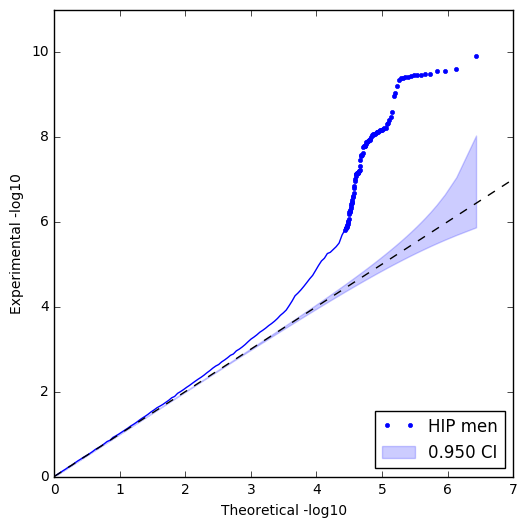

In [7]:
# This is an example of a classic QQ plot with 95% confidence interval plotted for the null distribution

mpl.rcParams['figure.dpi']=100
mpl.rcParams['savefig.dpi']=100
mpl.rcParams['figure.figsize']=5.375, 5.375

qqplot([hip_m['f3']], 
       ['HIP men'], 
       color=['b'], 
       fill_dens=[0.2], 
       error_type='theoretical', 
       distribution='beta',
       title='')


plt.savefig('qq_HIPmen_theoretical_error.png', dpi=300)

In [8]:
# Now we want to calculate the genomic control (inflation factor, lambda)
get_lambda(hip_m['f3'], definition = 'median')

1.0

assocplots\qqplot.py:75: RuntimeWarning: divide by zero encountered in log10
  plt.fill_between(-np.log10(q_th), -np.log10(q_data/q_th*q_err[:,0]), -np.log10(q_data/q_th*q_err[:,1]), color=color[j], alpha=fill_dens[j], label='%1.3f CI'%alpha)
assocplots\qqplot.py:75: RuntimeWarning: divide by zero encountered in divide
  plt.fill_between(-np.log10(q_th), -np.log10(q_data/q_th*q_err[:,0]), -np.log10(q_data/q_th*q_err[:,1]), color=color[j], alpha=fill_dens[j], label='%1.3f CI'%alpha)


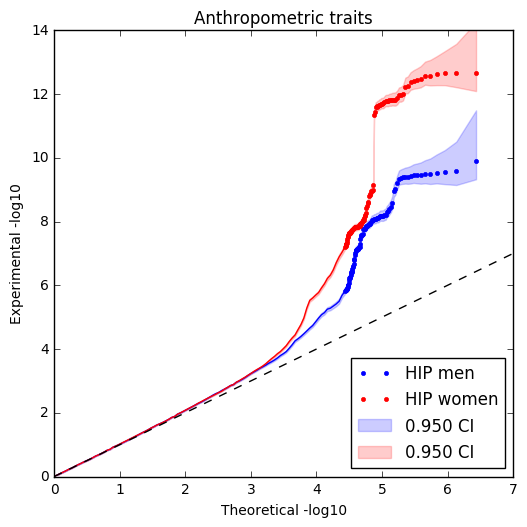

In [9]:
# This is a qq plot showing two experimental groups
mpl.rcParams['figure.dpi']=100
mpl.rcParams['savefig.dpi']=100
mpl.rcParams['figure.figsize']=5.375, 5.375

qqplot([hip_m['f3'], hip_w['f3']], 
       ['HIP men', 'HIP women'], 
       color=['b','r'], 
       fill_dens=[0.2,0.2], 
       error_type='experimental', 
       distribution='beta',
       title='Anthropometric traits')

plt.savefig('qq_two_hip_groups.png', dpi=300)